# Understanding and predicting customer behaviour 

## Telecom customer churn

<hr>

<b>
Dataset : Telco customer churn <br>
Source : https://www.kaggle.com/blastchar/telco-customer-churn ( IBM Sample dataset)
</b>

Here, IBM provided customer data for Telco industry to predict behaviour of the customers. Main objective is that to analyze customer behavious and develop strategies for customer retention.

Dataset has information related,
- Demographic: gender, age range and if they have any partner or dependent.
- Usage: User has phone or internet service. Also information related to multiline phone, streaming services and many more.
- Account type: How long they have been a customer, contract type, payment method, paperless billing, monthly charges.

## Main objective of this notebook is to explore this domain and learn about the subject using Exploratory Data Analysis (EDA).

### In this notebook,
- First we understand about the dataset
- Then we clean the dataset and make it ready for analysis
- After that, we explore data in detail using EDA


### Problem / Objective of this analysis:
- Predict customer behaviour to <b>reduce customer churn rate</b> and <b>improve customer retention</b>. And churn rate formula is,
<img src='./churn_model.png'></img>

Assumption: Let's assume that all the records given in this dataset are for particular interval.


## Load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

sns.set()
%matplotlib inline

In [2]:
# loading data
df_raw = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Dataset exploration

In [3]:
df_raw.shape # dataset has 7043 records and 21 features

(7043, 21)

In [4]:
df_raw.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# checking null values
df_raw.isnull().any() # Dataset has no null value

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [7]:
# Check for duplicate values
df_raw.duplicated().sum()

0

In [8]:
# type, null/not null and no of records in each feature
df_raw.info() # here we are interested in churn column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

## Data Cleaning

Here, we are going to rename some columns as well as modifying records with proper format for further analysis.

In [64]:
df_cal = df_raw.copy()
df_cal.rename(columns={'gender':'Gender'
                       ,'customerID':'CustomerID'
                       ,'Contract':'ContractType'
                       ,'InternetService':'InternetServiceType'
                       ,'tenure':'Tenure'
                      }
              ,inplace=True)


df_cal['Partner'] = df_cal.Partner.map({'Yes':1,'No':0})
df_cal['Dependents'] = df_cal.Dependents.map({'Yes':1,'No':0})

df_cal['PhoneService'] = df_cal.PhoneService.map({'Yes':1,'No':0})
df_cal['MultipleLines'] = df_cal.MultipleLines.map({'Yes':1,'No':0,'No phone service':0})

df_cal['InternetService'] = df_cal.InternetServiceType.map({'DSL':1,'Fiber optic':1,'No':0})
df_cal['OnlineSecurity'] = df_cal.OnlineSecurity.map({'Yes':1,'No':0,'No internet service':0})
df_cal['OnlineBackup'] = df_cal.OnlineBackup.map({'Yes':1,'No':0,'No internet service':0})
df_cal['DeviceProtection'] = df_cal.DeviceProtection.map({'Yes':1,'No':0,'No internet service':0})
df_cal['TechSupport'] = df_cal.TechSupport.map({'Yes':1,'No':0,'No internet service':0})
df_cal['StreamingTV'] = df_cal.StreamingTV.map({'Yes':1,'No':0,'No internet service':0})
df_cal['StreamingMovies'] = df_cal.StreamingMovies.map({'Yes':1,'No':0,'No internet service':0})

df_cal['IsContracted'] = df_cal.ContractType.map({'One year':1,'Two year':1,'Month-to-month':0})
df_cal['PaperlessBilling'] = df_cal.PaperlessBilling.map({'Yes':1,'No':0})
df_cal['Churn'] = df_cal.Churn.map({'Yes':1,'No':0})

df_cal.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,...,StreamingTV,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,0,0,One year,0,Mailed check,56.95,1889.5,0,1,1
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,0


In [65]:
# Converting TotalCharges into Numeric, but some of the records are empty, so first we need to deal with them
print(df_cal[df_cal['TotalCharges']==' '][['MonthlyCharges','TotalCharges']]) 
df_cal.loc[df_cal['TotalCharges']==' ','TotalCharges'] = np.nan

      MonthlyCharges TotalCharges
488            52.55             
753            20.25             
936            80.85             
1082           25.75             
1340           56.05             
3331           19.85             
3826           25.35             
4380           20.00             
5218           19.70             
6670           73.35             
6754           61.90             


In [66]:
# first we convert TotalCharges to float and then replace with tenure * monthly charges
df_cal['TotalCharges'] = df_cal['TotalCharges'].astype('float64')
df_cal.loc[df_cal['TotalCharges']==np.nan,'TotalCharges'] = df_cal['MonthlyCharges'] * df_cal['Tenure']

In [67]:
def createAnyInternetService(row):
    if ((row["OnlineSecurity"]==1)| (row['OnlineBackup']==1) | (row['DeviceProtection']==1) | (row['TechSupport']==1) 
        | (row['StreamingTV']==1) | (row['StreamingMovies']==1)):
        return 1
    else:
        return 0 
                
df_cal['AnyInternetService'] = df_cal.apply(lambda row: createAnyInternetService(row), axis = 1)
df_cal.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,...,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted,AnyInternetService
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,1
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,0,One year,0,Mailed check,56.95,1889.50,0,1,1,1
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1,1
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,0,0


Here, below output shows the final data structure of the dataset.

- Demographic related information
    - Gender
    - SeniorCitizen
    - Parter
    - Dependents
- Usage related information
    - PhoneService
    - MultipleLines
    - InternetServiceType
    - OnlineSecurity
    - OnlineBackup
    - DeviceProtection
    - TechSupport
    - StreamingTV
    - StreamingMovies
- Account related information
    - Tenure
    - IsContracted
    - ContractType
    - PaperlessBilling
    - PaymentMethod
    - MonthlyCharges
    - TotalCharges
    
Here, <b>Categorical variables</b> are;<br>
Gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, IsContracted, PaperlessBilling, InternetServiceType, ContractType and PaymentMethod;<br>
While <b>numeric  variables</b> are;<br>
Tenure, MonthlyCharges and TotalCharges.

In [41]:
df_cal.dtypes

CustomerID              object
Gender                  object
SeniorCitizen            int64
Partner                  int64
Dependents               int64
Tenure                   int64
PhoneService             int64
MultipleLines            int64
InternetServiceType     object
OnlineSecurity           int64
OnlineBackup             int64
DeviceProtection         int64
TechSupport              int64
StreamingTV              int64
StreamingMovies          int64
ContractType            object
PaperlessBilling         int64
PaymentMethod           object
MonthlyCharges         float64
TotalCharges           float64
Churn                    int64
InternetService          int64
IsContracted             int64
dtype: object

In [47]:
categorical_cols = ["Gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines"
                    ,"OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV"
                    ,"StreamingMovies","IsContracted","PaperlessBilling","InternetServiceType"
                    ,"ContractType","PaymentMethod"]

num_cols = ["Tenure","MonthlyCharges","TotalCharges"]

In [48]:
df_cal[categorical_cols].describe(include='all')

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,IsContracted,PaperlessBilling,InternetServiceType,ContractType,PaymentMethod
count,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043,7043
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,4
top,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fiber optic,Month-to-month,Electronic check
freq,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3096,3875,2365
mean,NaN,0.162147,0.483033,0.299588,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.449808,0.592219,NaN,NaN,NaN
std,NaN,0.368612,0.499748,0.458110,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.497510,0.491457,NaN,NaN,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN
75%,NaN,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN


In [60]:
df_cal[num_cols].describe()

,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


## EDA - Exploratory Data Analysis

So far, we know that telco data has 7043 customers' data with 24 features (including 3 calculative features which we added) and has information related to demographic, usage and account types.

Our next objective would be,

- Calculate churn rate
- Find out the features which helps distinguise churn customers and existing customers
     - Distribution of features<br>
     - Correlation between features<br>
     - Clusturing in churn customers<br>
       

In [79]:
# Calculate churn rate of telco company's dataset?

Churn_rate = df_cal['Churn'].value_counts() / df_cal.shape[0]
print(Churn_rate)

# from output, churn rate is around 26%

0    0.73463
1    0.26537
Name: Churn, dtype: float64


#### Churn vs existing customer 

Our hypothesis is that customer left company because of 
- High monthly charges
- Poor customer service
- Better compatitor offers

From above reasons and based on our dataset, we can varify first season. 

And from below analysis,
- We varified that our first hypothesis is true - Customer left company because of high monthly charges.
- And some the characteristics of churn customers is that subscriber have internet service usage, paperless billing method and electronic check payment method and month-to-month contract type with company.

In [171]:
# calculate mean summary of customers (Churn vs non churn). 
churn_summary = df_cal.groupby('Churn')
print(churn_summary['Tenure','MonthlyCharges'].mean())


          Tenure  MonthlyCharges
Churn                           
0      37.569965       61.265124
1      17.979133       74.441332


In [172]:
def categorical_var_churn_dist(feature,filterFea=''):
    if filterFea != '':
        feature_summary = df_cal[df_cal[filterFea]==1].groupby('Churn')[feature].value_counts(normalize=True).reset_index(name='Percentage')
        print(feature," summary: \n ", feature_summary)
        sns.catplot(x=feature
                    , y='Percentage'
                    , data = feature_summary
                    , col='Churn'
                    , kind='bar')
        plt.show()
    else:
        feature_summary = churn_summary[feature].value_counts(normalize=True).reset_index(name='Percentage')
        print(feature," summary: \n ", feature_summary)
        sns.catplot(x=feature
                    , y='Percentage'
                    , data = feature_summary
                    , col='Churn'
                    , kind='bar')
        plt.show()

        


Gender  summary: 
     Churn  Gender  Percentage
0      0    Male    0.507344
1      0  Female    0.492656
2      1  Female    0.502408
3      1    Male    0.497592


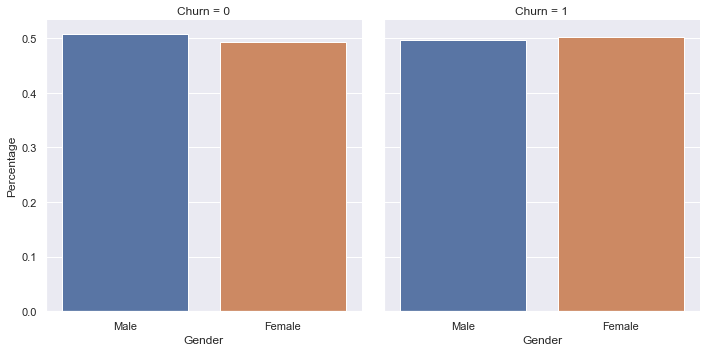

In [126]:
categorical_var_churn_dist('Gender')

<b>Gender is equally distributed in existing as well as churn subscribers. So, gender is not helping in the prediction of churn. </b>

SeniorCitizen  summary: 
     Churn  SeniorCitizen  Percentage
0      0              0    0.871279
1      0              1    0.128721
2      1              0    0.745318
3      1              1    0.254682


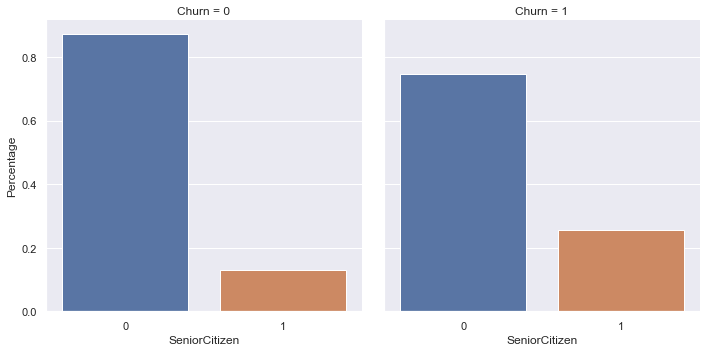

In [127]:
categorical_var_churn_dist('SeniorCitizen')

<b>Percentage of senior citizen are more likely to be churn compared to existing senior citizen distribution.</b>

Partner  summary: 
     Churn  Partner  Percentage
0      0        1    0.528218
1      0        0    0.471782
2      1        0    0.642055
3      1        1    0.357945


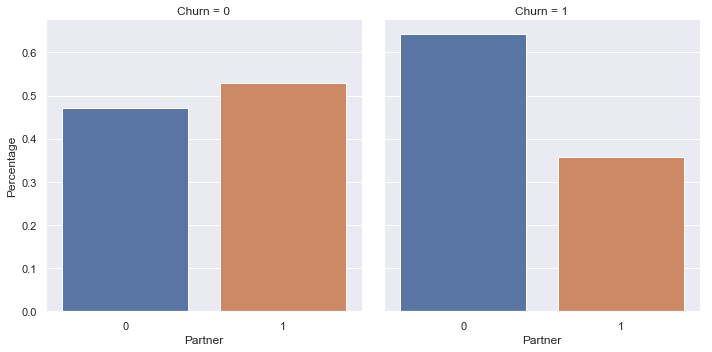

In [128]:
categorical_var_churn_dist('Partner')

Dependents  summary: 
     Churn  Dependents  Percentage
0      0           0    0.655199
1      0           1    0.344801
2      1           0    0.825575
3      1           1    0.174425


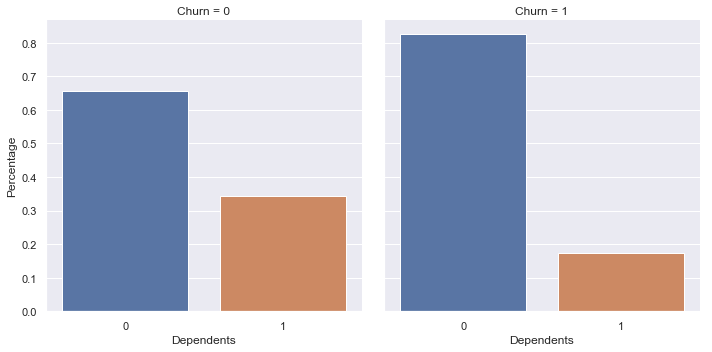

In [129]:
categorical_var_churn_dist('Dependents')

<b>However, for partners and dependents, it's inversely true.</b>

PhoneService  summary: 
     Churn  PhoneService  Percentage
0      0             1    0.901044
1      0             0    0.098956
2      1             1    0.909042
3      1             0    0.090958


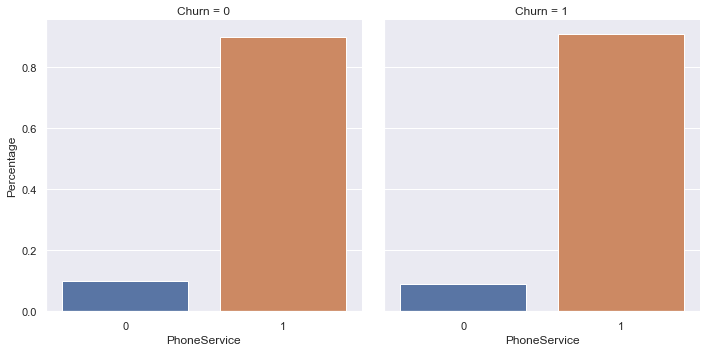

In [130]:
categorical_var_churn_dist('PhoneService')

InternetService  summary: 
     Churn  InternetService  Percentage
0      0                1    0.726904
1      0                0    0.273096
2      1                1    0.939540
3      1                0    0.060460


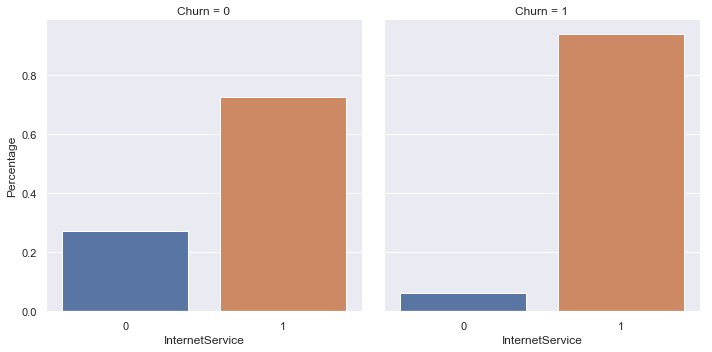

In [131]:
categorical_var_churn_dist('InternetService')

<b>From internet and phone service, 93% of the churn customer had internet service compared to 72% of existing customer have internet service.</b>

StreamingTV  summary: 
     Churn  StreamingTV  Percentage
0      0            1    0.503324
1      0            0    0.496676
2      1            0    0.536446
3      1            1    0.463554


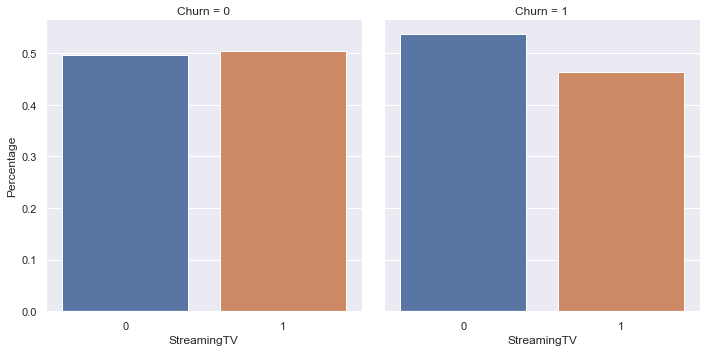

In [135]:
categorical_var_churn_dist('StreamingTV','InternetService')

StreamingMovies  summary: 
     Churn  StreamingMovies  Percentage
0      0                0    0.630073
1      0                1    0.369927
2      1                0    0.562333
3      1                1    0.437667


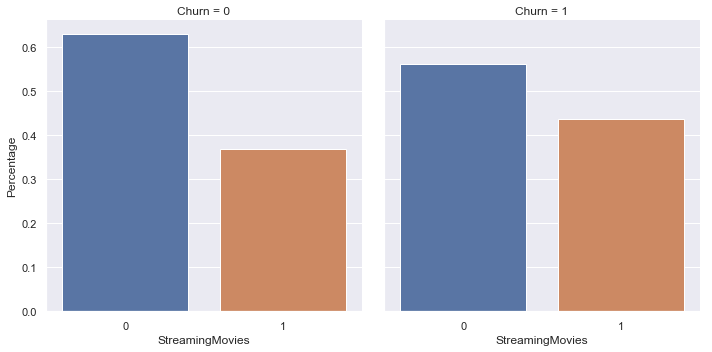

In [136]:
categorical_var_churn_dist('StreamingMovies')

OnlineSecurity  summary: 
     Churn  OnlineSecurity  Percentage
0      0               0    0.541611
1      0               1    0.458389
2      1               0    0.832005
3      1               1    0.167995


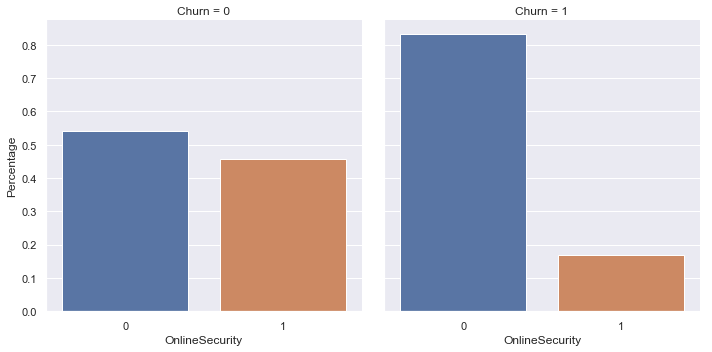

In [138]:
categorical_var_churn_dist('OnlineSecurity','InternetService')

OnlineBackup  summary: 
     Churn  OnlineBackup  Percentage
0      0             1    0.506780
1      0             0    0.493220
2      1             0    0.702164
3      1             1    0.297836


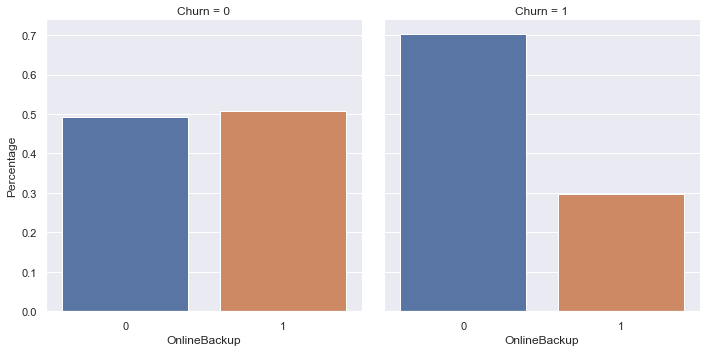

In [139]:
categorical_var_churn_dist('OnlineBackup','InternetService')

DeviceProtection  summary: 
     Churn  DeviceProtection  Percentage
0      0                 0    0.500931
1      0                 1    0.499069
2      1                 0    0.689636
3      1                 1    0.310364


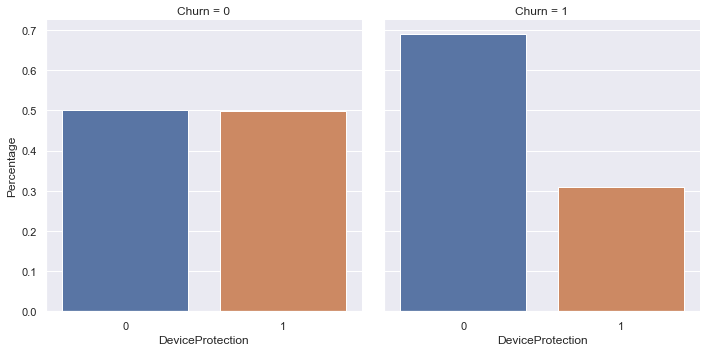

In [140]:
categorical_var_churn_dist('DeviceProtection','InternetService')

TechSupport  summary: 
     Churn  TechSupport  Percentage
0      0            0    0.538952
1      0            1    0.461048
2      1            0    0.823462
3      1            1    0.176538


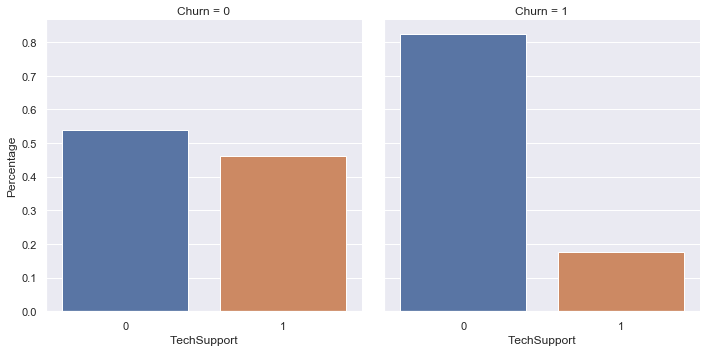

In [141]:
categorical_var_churn_dist('TechSupport','InternetService')

<b>In internet service/usage, churn subscriber has highly likely to have Streaming Movies compared to existing subscriber </b>

PaperlessBilling  summary: 
     Churn  PaperlessBilling  Percentage
0      0                 1    0.535562
1      0                 0    0.464438
2      1                 1    0.749064
3      1                 0    0.250936


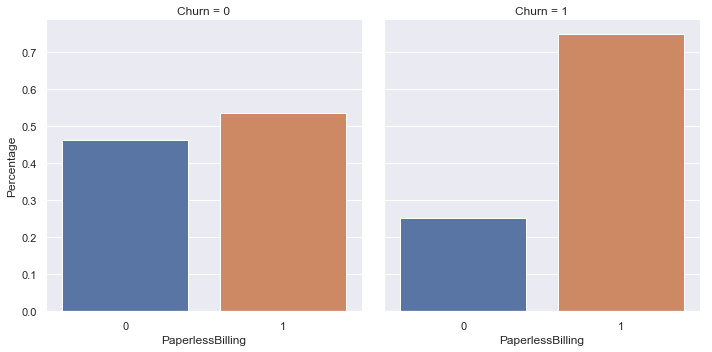

In [142]:
categorical_var_churn_dist('PaperlessBilling')

<b>74% of the churn subscriber has paperlessbilling method compared to 53% of the existing subscriber.</b>

InternetServiceType  summary: 
     Churn InternetServiceType  Percentage
0      0                 DSL     0.52167
1      0         Fiber optic     0.47833
2      1         Fiber optic     0.73861
3      1                 DSL     0.26139


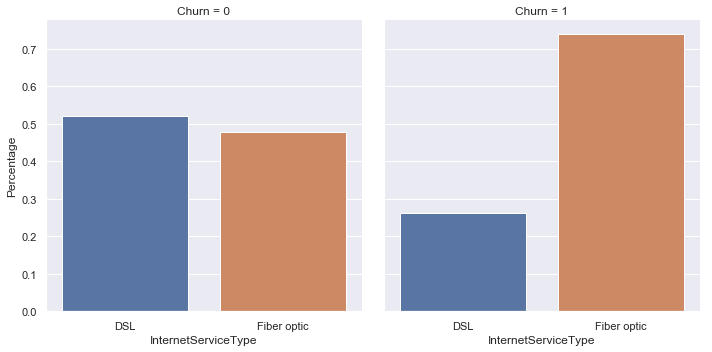

In [144]:
categorical_var_churn_dist('InternetServiceType','InternetService')

<b>Churn subscriber likely to have fiber optic(73%) internet service rather than DSL service</b>

ContractType  summary: 
     Churn    ContractType  Percentage
0      0  Month-to-month    0.429068
1      0        Two year    0.318322
2      0        One year    0.252609
3      1  Month-to-month    0.885500
4      1        One year    0.088818
5      1        Two year    0.025682


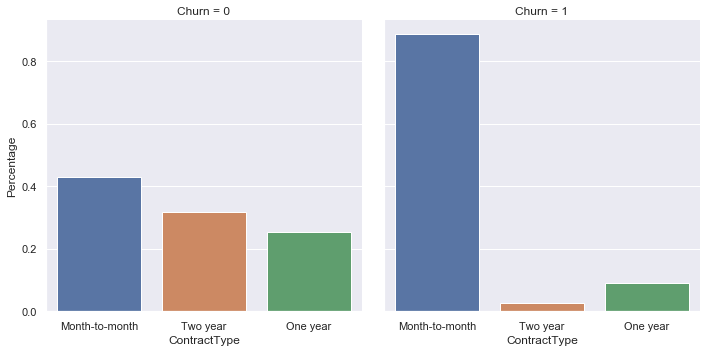

In [145]:
categorical_var_churn_dist('ContractType')

<b> 88% of churn subscriber has Month-to-month service, means not contracted with company </b>

PaymentMethod  summary: 
     Churn              PaymentMethod  Percentage
0      0               Mailed check    0.252029
1      0           Electronic check    0.250097
2      0    Credit card (automatic)    0.249324
3      0  Bank transfer (automatic)    0.248550
4      1           Electronic check    0.573034
5      1               Mailed check    0.164794
6      1  Bank transfer (automatic)    0.138042
7      1    Credit card (automatic)    0.124131


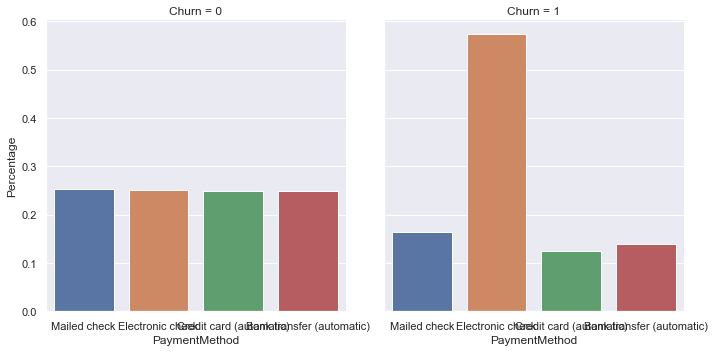

In [170]:
categorical_var_churn_dist('PaymentMethod')

<b>Churn subscriber most likely to have Elctronic Check service (57%)</b>

#### Distribution of Tenure, Monthly Charges

Right now, in our dataset, we have continuos variables are Tenure, MonthlyCharges and TotalCharges. so let's deep dive into this variables.

- Tenure Distribution shows that customers who has tenure around less than a year left the brand more
- Monthly Charges Distribution shows that customers who has around more than $65 left brands more

In [178]:
def numerical_distribution(feature):
    fig = plt.figure(figsize=(15,5))

    ax = sns.kdeplot(df_cal.loc[(df_cal['Churn']==1),feature]
                     , color = 'g'
                     , shade = True
                     , label='Chrun')

    ax = sns.kdeplot(df_cal.loc[(df_cal['Churn']==0) ,feature]
                     , color = 'b'
                     , shade = True
                     , label='No chrun')
    title_str = feature + " Distribution: Churn vs No churn"
    plt.title(title_str)
    plt.show()

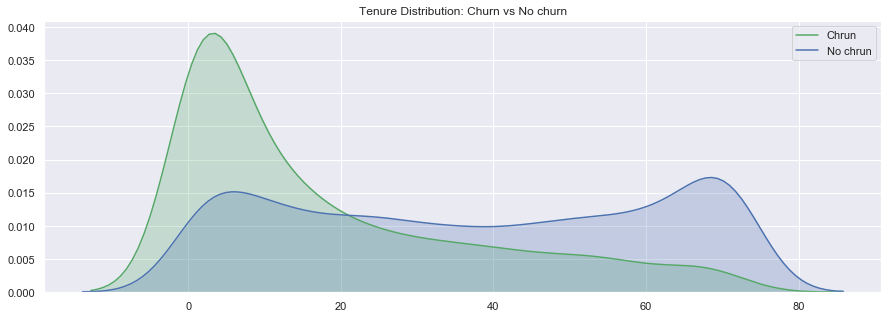

In [182]:
numerical_distribution('Tenure')

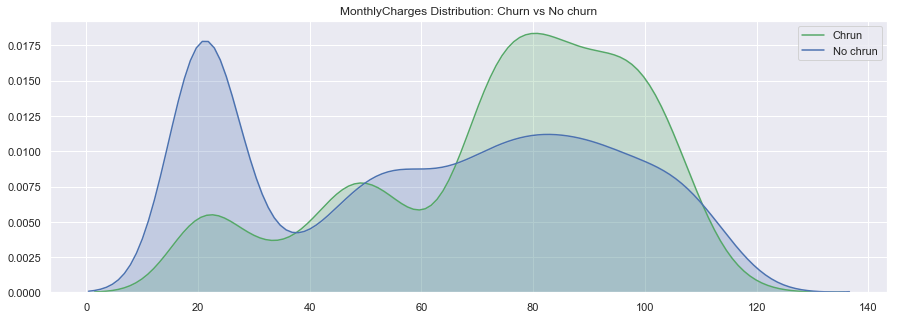

In [183]:
numerical_distribution('MonthlyCharges')

#### Tenure vs Monthly charges

Let's check is there any relationship between Tenure and MonthlyCharges. From the analysis, we can see that there are some clusters related to churn based on tenure and monthly charges.

In [206]:
# normalized tenure and monthlycharges

df_cal['Tenure_norm'] = (df_cal['Tenure'] - df_cal['Tenure'].min()) / (df_cal['Tenure'].max() - df_cal['Tenure'].min())
df_cal['MonthlyCharges_norm'] = (df_cal['MonthlyCharges'] - df_cal['MonthlyCharges'].min())/ (df_cal['MonthlyCharges'].max() - df_cal['MonthlyCharges'].min())
df_cal.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted,AnyInternetService,Tenure_norm,MonthlyCharges_norm
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,1,Electronic check,29.85,29.85,0,1,0,1,0.013889,0.115423
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,0,Mailed check,56.95,1889.50,0,1,1,1,0.472222,0.385075
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,1,Mailed check,53.85,108.15,1,1,0,1,0.027778,0.354229
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,0,Bank transfer (automatic),42.30,1840.75,0,1,1,1,0.625000,0.239303
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,1,Electronic check,70.70,151.65,1,1,0,0,0.027778,0.521891


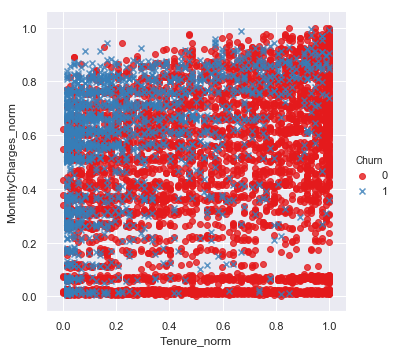

In [207]:
sns.lmplot(x='Tenure_norm',y='MonthlyCharges_norm',data=df_cal
               ,hue='Churn'
               ,fit_reg=False
               ,markers=["o", "x"]
               ,palette="Set1"
          )
plt.show() # from output, we can see that there are some clusters

#### K-means clustering

Here, to see different kind of clusters, we are using K-means cluster method.

Text(0.5,1,'Elbow curve')

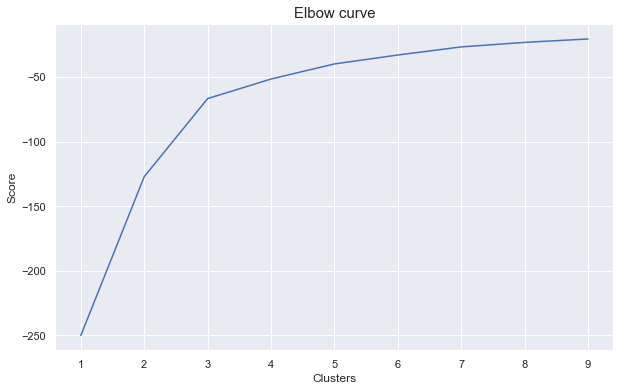

In [211]:
# checking number of clusters

from sklearn.cluster import KMeans

df_kmeans_data = df_cal[df_cal.Churn==1][['Tenure_norm','MonthlyCharges_norm']]

k = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in k]

score = [kmeans[i].fit(df_kmeans_data).score(df_kmeans_data)  for i in range(len(kmeans))]

plt.figure(figsize=(10,6))
plt.plot(k,score)
plt.xlabel("Clusters")
plt.ylabel("Score")
plt.title("Elbow curve",fontsize=15)

# Using Elbrow curve method, 3 looks more resonable

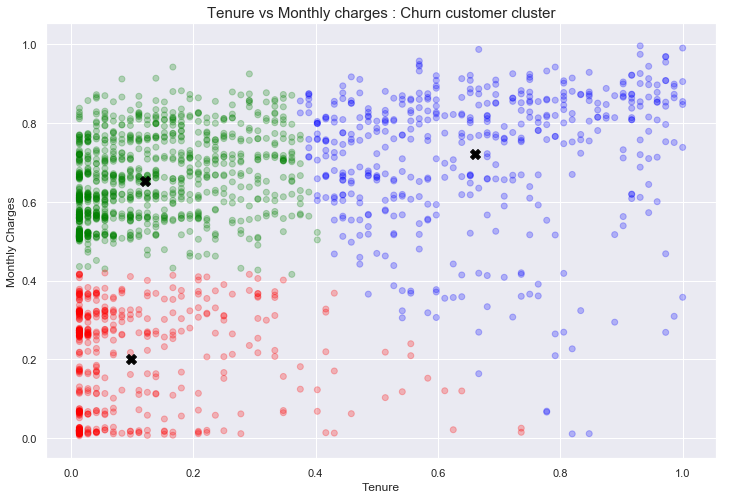

In [212]:
df_cal['Cluster'] = -1 # by default set Cluster to -1

kmeans = KMeans(n_clusters=3 # No of cluster in data
                , random_state = 2 # Selecting same training data
               ) 

kmeans.fit(df_cal[df_cal.Churn==1][['Tenure_norm','MonthlyCharges_norm']])
kmean_colors = ['green' if c == 0 else 'blue' if c == 1 else 'red' for c in kmeans.labels_]

df_cal.loc[(df_cal.Churn==1),'Cluster'] = kmeans.fit_predict(df_cal[df_cal.Churn==1][['Tenure_norm','MonthlyCharges_norm']])


fig = plt.figure(figsize=(12,8))
plt.scatter(x='Tenure_norm'
            , y='MonthlyCharges_norm'
            , data=df_cal[df_cal.Churn==1] 
            , color=kmean_colors # color of data points
            , alpha=0.25 # transparancy of data points
           )

plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")

plt.scatter(x=kmeans.cluster_centers_[:,0]
            , y=kmeans.cluster_centers_[:,1]
            , color='black'
            , marker='X' # Marker sign for data points
            , s=100 # marker size
           )
plt.title("Tenure vs Monthly charges : Churn customer cluster",fontsize=15)
plt.show()

0    0.507758
1    0.248261
2    0.243981
Name: Cluster, dtype: float64


Text(0.5,1,'Distribution of Clusters')

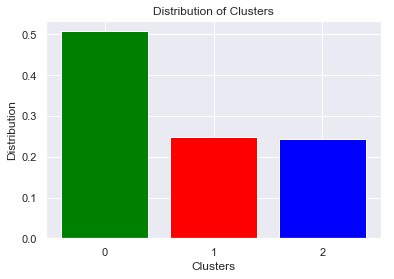

In [213]:
# distribution of cluster
print(df_cal[df_cal['Churn']==1].Cluster.value_counts(normalize=True))

# 0 - Green; 1 - Red; 2 - Blue


plt.bar(x=[0,1,2]
        , height=df_cal[df_cal['Churn']==1].Cluster.value_counts(normalize=True).values
        , tick_label=[0,1,2]
        , color=['Green','red','blue'])
plt.xlabel("Clusters")
plt.ylabel("Distribution")
plt.title("Distribution of Clusters")

There are three types of customer group , who are more likely to churn<br>
1) Low tenure and high monthly charges<br>
2) High tenure and High monthly charges<br>
3) Low tenure and low monthly charges

In [214]:
df_cluster_gp = df_cal[df_cal['Churn']==1].groupby('Cluster')
print(df_cluster_gp['Tenure','MonthlyCharges'].mean())

            Tenure  MonthlyCharges
Cluster                           
0         8.775553       83.821654
1        47.549569       90.731250
2         7.043860       38.343860


Let's analyse characteristics of different clusters based on information available in dataset.

In [334]:
def cluster_analysis(df,cluster_gp,feature):
    group_gp = cluster_gp[feature].value_counts(normalize=True).to_frame()

    #pd.concat([group_gp.index.name , group_gp.values])
    group_gp.columns = ['Percentage']
    group_gp = group_gp.reset_index()
    group_gp_new = group_gp.copy()  
    return (df.groupby('Churn')[feature].value_counts(normalize=True), group_gp_new)

### Demographic analysis by cluster

Here, we have gender, age bands (in terms of married, have children and senior citizen) related information. 


In [336]:
(gender_dist , gender_cluster_cnt) = cluster_analysis(df_cal,df_cluster_gp,'Gender')
print(gender_dist)
print(gender_cluster_cnt)

Churn  Gender
0      Male      0.507344
       Female    0.492656
1      Female    0.502408
       Male      0.497592
Name: Gender, dtype: float64
   Cluster  Gender  Percentage
0        0  Female    0.531085
1        0    Male    0.468915
2        1    Male    0.519397
3        1  Female    0.480603
4        2    Male    0.535088
5        2  Female    0.464912


Based on above information,

1) Cluster 0 - Less tenure and high monthly charges
    - More likely to be Female
2) Cluster 1 -  High tenure and High monthly charges
    - More likely to be male
3) Cluster 2 - Less tenure and low monthly charges
    - More likely to be male 

In [338]:
(seniorCitizen_dist,seniorCitizen_cluster_cnt) = cluster_analysis(df_cal,df_cluster_gp,'SeniorCitizen')
print(seniorCitizen_dist)
print(seniorCitizen_cluster_cnt)

Churn  SeniorCitizen
0      0                0.871279
       1                0.128721
1      0                0.745318
       1                0.254682
Name: SeniorCitizen, dtype: float64
   Cluster  SeniorCitizen  Percentage
0        0              0    0.723920
1        0              1    0.276080
2        1              0    0.676724
3        1              1    0.323276
4        2              0    0.859649
5        2              1    0.140351


Based on above information,

1) Cluster 0 - Less tenure and high monthly charges
    - More likely to be Female and seniro citizen
2) Cluster 1 -  High tenure and High monthly charges
    - More likely to be male and senior citizen
3) Cluster 2 - Less tenure and low monthly charges
    - More likely to be male 

Same thing we can do for partner and depdendent variable.

### Usage analysis


Usage related information


Phone service : <br>

PhoneService - int64<br>
MultipleLines - int64<br>

Internet service : <br>

InternetServiceType - object<br>
OnlineSecurity - int64<br>
OnlineBackup - int64<br>
DeviceProtection - int64<br>
TechSupport - int64<br>
StreamingTV - int64<br>
StreamingMovies - int64<br>


In [342]:
internet_dist,internet_cluster_cnt = cluster_analysis(df_cal,df_cluster_gp,'InternetService')
print(internet_dist)
print(internet_cluster_cnt)

Churn  InternetService
0      1                  0.726904
       0                  0.273096
1      1                  0.939540
       0                  0.060460
Name: InternetService, dtype: float64
   Cluster  InternetService  Percentage
0        0                1    1.000000
1        1                1    0.991379
2        1                0    0.008621
3        2                1    0.760965
4        2                0    0.239035


Based on above information,

1) Cluster 0 - Less tenure and high monthly charges
    - More likely to be Female, seniro citizen and Internet service user
2) Cluster 1 -  High tenure and High monthly charges
    - More likely to be male, senior citizen and internet service user
3) Cluster 2 - Less tenure and low monthly charges
    - More likely to be male 

In [347]:
streamingMovies_Dist,streamingMovies_cluster_cnt = cluster_analysis(df_cal,df_cluster_gp,'StreamingMovies')
print(streamingMovies_Dist)
print(streamingMovies_cluster_cnt)

Churn  StreamingMovies
0      0                  0.630073
       1                  0.369927
1      0                  0.562333
       1                  0.437667
Name: StreamingMovies, dtype: float64
   Cluster  StreamingMovies  Percentage
0        0                0    0.553214
1        0                1    0.446786
2        1                1    0.713362
3        1                0    0.286638
4        2                0    0.861842
5        2                1    0.138158


Based on above information,

1) Cluster 0 - Less tenure and high monthly charges
    - More likely to be Female, seniro citizen and Internet service user
2) Cluster 1 -  High tenure and High monthly charges
    - More likely to be male, senior citizen, internet service user and streaming movies service
3) Cluster 2 - Less tenure and low monthly charges
    - More likely to be male 

In [350]:
contract_Dist,contract_cluster_cnt = cluster_analysis(df_cal,df_cluster_gp,'ContractType')
print(contract_Dist)
print(contract_cluster_cnt)

Churn  ContractType  
0      Month-to-month    0.429068
       Two year          0.318322
       One year          0.252609
1      Month-to-month    0.885500
       One year          0.088818
       Two year          0.025682
Name: ContractType, dtype: float64
   Cluster    ContractType  Percentage
0        0  Month-to-month    0.983140
1        0        One year    0.016860
2        1  Month-to-month    0.625000
3        1        One year    0.278017
4        1        Two year    0.096983
5        2  Month-to-month    0.947368
6        2        One year    0.046053
7        2        Two year    0.006579


Based on above information,

1) Cluster 0 - Less tenure and high monthly charges
    - More likely to be Female, seniro citizen,  Internet service user and month-to-month service
2) Cluster 1 -  High tenure and High monthly charges
    - More likely to be male, senior citizen, internet service user and streaming movies service
3) Cluster 2 - Less tenure and low monthly charges
    - More likely to be male and month-to-month service

In [355]:
billing_Dist,billing_cluster_cnt = cluster_analysis(df_cal,df_cluster_gp,'PaperlessBilling')
print(billing_Dist)
print(billing_cluster_cnt)

Churn  PaperlessBilling
0      1                   0.535562
       0                   0.464438
1      1                   0.749064
       0                   0.250936
Name: PaperlessBilling, dtype: float64
   Cluster  PaperlessBilling  Percentage
0        0                 1    0.812434
1        0                 0    0.187566
2        1                 1    0.799569
3        1                 0    0.200431
4        2                 1    0.565789
5        2                 0    0.434211


Based on above information,

1) Cluster 0 - Less tenure and high monthly charges
    - More likely to be Female, seniro citizen,  Internet service user, month-to-month service and paperlessbilling method
2) Cluster 1 -  High tenure and High monthly charges
    - More likely to be male, senior citizen, internet service user and streaming movies service and paperlessbilling method
3) Cluster 2 - Less tenure and low monthly charges
    - More likely to be male and month-to-month service

In [551]:
payment_Dist,payment_cluster_cnt = cluster_analysis(df_cal,df_cluster_gp,'PaymentMethod')
print(payment_Dist)
print(payment_cluster_cnt)

Churn  PaymentMethod            
0      Mailed check                 0.252029
       Electronic check             0.250097
       Credit card (automatic)      0.249324
       Bank transfer (automatic)    0.248550
1      Electronic check             0.573034
       Mailed check                 0.164794
       Bank transfer (automatic)    0.138042
       Credit card (automatic)      0.124131
Name: PaymentMethod, dtype: float64
    Cluster              PaymentMethod  Percentage
0         0           Electronic check    0.679663
1         0  Bank transfer (automatic)    0.119073
2         0               Mailed check    0.116965
3         0    Credit card (automatic)    0.084299
4         1           Electronic check    0.521552
5         1    Credit card (automatic)    0.217672
6         1  Bank transfer (automatic)    0.209052
7         1               Mailed check    0.051724
8         2           Electronic check    0.403509
9         2               Mailed check    0.379386
10        

Based on above information,

1) Cluster 0 - Less tenure and high monthly charges
    - More likely to be Female, seniro citizen,  Internet service user, month-to-month service, paperlessbilling method and Elextronic check payment mothod
2) Cluster 1 -  High tenure and High monthly charges
    - More likely to be male, senior citizen, internet service user and streaming movies service and paperlessbilling method and Credit card (automatic)/Bank transfer(automatic) payment mothod
3) Cluster 2 - Less tenure and low monthly charges
    - More likely to be male and month-to-month service and Mailed check payment method

In [380]:
def cluster_tenure_charges_cal(df,tenure_charges_gp,feature,clusters):
    df_cluster_gender_gp = tenure_charges_gp.groupby(['Cluster',feature],as_index=False)
    tenure_charges_gp =  df_cluster_gender_gp['Tenure','MonthlyCharges'].mean()
    tenure_charges_gp['Category'] = feature
    tenure_charges_gp_final = pd.DataFrame()
    
    for i in clusters:
        tenure_charges_gp_final = tenure_charges_gp_final.append(tenure_charges_gp[(tenure_charges_gp['Cluster']==i[0]) & 
                                                                                      (tenure_charges_gp[feature]==i[1])])
    
    tenure_charges_gp_final.rename(columns={feature:'Label'},inplace=True)
    return df.append(tenure_charges_gp_final.reset_index(),ignore_index=True)

In [382]:
# let's calculate tenure and monthly chages for further visualization
churn_subs = df_cal[df_cal['Churn']==1]
tenure_charges_gp = pd.DataFrame()

tenure_charges_gp = cluster_tenure_charges_cal(tenure_charges_gp,churn_subs,"Gender",[(0,'Female'),(1,'Male'),(2,'Male')])
tenure_charges_gp = cluster_tenure_charges_cal(tenure_charges_gp,churn_subs,"SeniorCitizen",[(0,1),(1,1)])
tenure_charges_gp = cluster_tenure_charges_cal(tenure_charges_gp,churn_subs,"StreamingMovies",[(1,1)])
tenure_charges_gp = cluster_tenure_charges_cal(tenure_charges_gp,churn_subs,"PaperlessBilling",[(0,1),(1,1)])
tenure_charges_gp = cluster_tenure_charges_cal(tenure_charges_gp,churn_subs,"ContractType",[(0,'Month-to-month'),(2,'Month-to-month')])
tenure_charges_gp = cluster_tenure_charges_cal(tenure_charges_gp,churn_subs,"PaymentMethod",[(0,'Electronic check'),(1,'Credit card (automatic)'),(1,'Bank transfer (automatic)'),(2,'Mailed check')])
tenure_charges_gp

,index,Cluster,Label,Tenure,MonthlyCharges,Category
0,0,0,Female,8.418651,83.463889,Gender
1,3,1,Male,49.261411,90.909959,Gender
2,5,2,Male,6.881148,38.901844,Gender
3,1,0,1,9.736641,84.641794,SeniorCitizen
4,3,1,1,46.166667,91.943333,SeniorCitizen
5,3,1,1,48.927492,95.938822,StreamingMovies
6,1,0,1,9.005188,84.239818,PaperlessBilling
7,3,1,1,47.169811,92.091644,PaperlessBilling
8,0,0,Month-to-month,8.633441,83.784030,ContractType
9,5,2,Month-to-month,6.201389,38.522569,ContractType


In [433]:
tenure_charges_gp[tenure_charges_gp['Category']=='ContractType'].Label.unique()[0]

'Month-to-month'

In [434]:
def cluster_visualization_df(df,tenure_charges_gp,feature,marker,marker_index,color):
    tenure_charges_gp = tenure_charges_gp[tenure_charges_gp['Category']==feature]
    if tenure_charges_gp[tenure_charges_gp['Category']==feature].Label.unique()[0] ==1:
        label = [feature for i in range(len(tenure_charges_gp.Tenure.values))]
    else:
        label = tenure_charges_gp[tenure_charges_gp['Category']==feature].Label.values 
        
    df = df.append(pd.DataFrame({"Cluster":tenure_charges_gp.Cluster.values
                                    ,'Label':label
                                    ,'category':[feature for i in range(len(tenure_charges_gp.Tenure.values))]
                                    ,'Tenure':tenure_charges_gp.Tenure.values
                                    ,'MonthlyCharges':tenure_charges_gp.MonthlyCharges.values
                                    ,'Marker':[marker for i in range(len(tenure_charges_gp.Tenure.values))]
                                    ,'Marker_index' : [marker_index for i in range(len(tenure_charges_gp.Tenure.values))]
                                    ,'Color':[color for i in range(len(tenure_charges_gp.Tenure.values))]
                                   })
                      ,ignore_index=True)
    return df

In [519]:
cluster_visualize_gp = pd.DataFrame()
cluster_visualize_gp = cluster_visualization_df(cluster_visualize_gp,tenure_charges_gp,'Gender','+',[2,-1],'#1f77b4')
cluster_visualize_gp = cluster_visualization_df(cluster_visualize_gp,tenure_charges_gp,'SeniorCitizen','o',[-8,1.5],'#ff7f0e')
cluster_visualize_gp = cluster_visualization_df(cluster_visualize_gp,tenure_charges_gp,'StreamingMovies','^',[2,-1],'#2ca02c')
cluster_visualize_gp = cluster_visualization_df(cluster_visualize_gp,tenure_charges_gp,'PaperlessBilling','*',[-10,-2],'#d62728')
cluster_visualize_gp = cluster_visualization_df(cluster_visualize_gp,tenure_charges_gp,'ContractType','v',[-9,0.5],'#7f7f7f')
cluster_visualize_gp = cluster_visualization_df(cluster_visualize_gp,tenure_charges_gp,'PaymentMethod','>',[2,-1],'black')
cluster_visualize_gp

,Cluster,Label,category,Tenure,MonthlyCharges,Marker,Marker_index,Color
0,0,Female,Gender,8.418651,83.463889,+,"[2, -1]",#1f77b4
1,1,Male,Gender,49.261411,90.909959,+,"[2, -1]",#1f77b4
2,2,Male,Gender,6.881148,38.901844,+,"[2, -1]",#1f77b4
3,0,SeniorCitizen,SeniorCitizen,9.736641,84.641794,o,"[-8, 1.5]",#ff7f0e
4,1,SeniorCitizen,SeniorCitizen,46.166667,91.943333,o,"[-8, 1.5]",#ff7f0e
5,1,StreamingMovies,StreamingMovies,48.927492,95.938822,^,"[2, -1]",#2ca02c
6,0,PaperlessBilling,PaperlessBilling,9.005188,84.239818,*,"[-10, -2]",#d62728
7,1,PaperlessBilling,PaperlessBilling,47.169811,92.091644,*,"[-10, -2]",#d62728
8,0,Month-to-month,ContractType,8.633441,83.784030,v,"[-9, 0.5]",#7f7f7f
9,2,Month-to-month,ContractType,6.201389,38.522569,v,"[-9, 0.5]",#7f7f7f


In [539]:
cluster_visualize_gp[['category','Color']].drop_duplicates().category.values

array(['Gender', 'SeniorCitizen', 'StreamingMovies', 'PaperlessBilling',
       'ContractType', 'PaymentMethod'], dtype=object)

Text(0.5,1,'Tenure vs Monthly charges demographic distribution')

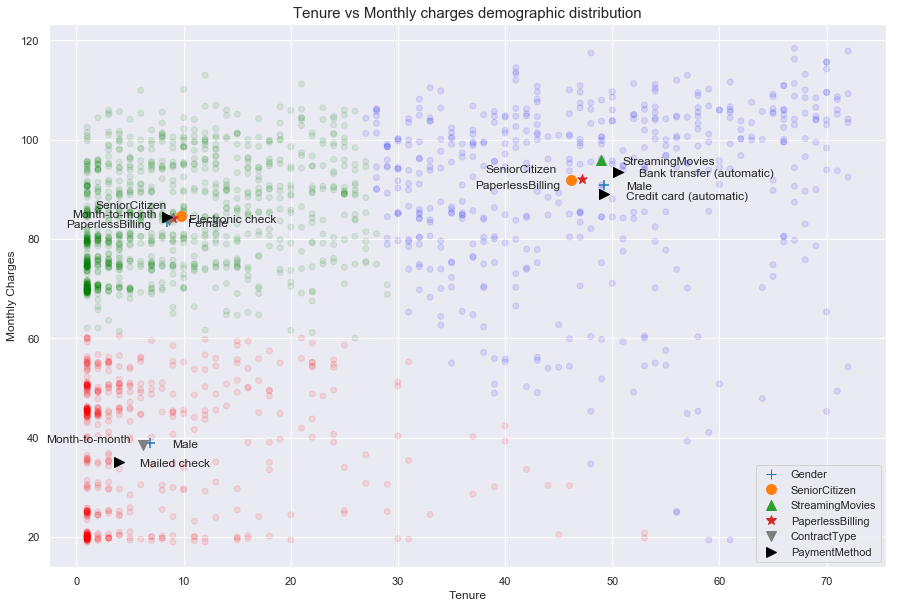

In [550]:
fig, ax = plt.subplots(figsize=(15,10))

ax.scatter(x='Tenure'
            , y='MonthlyCharges'
            , data=df_cal[df_cal.Churn==1] 
            , color=kmean_colors # color of data points
            , alpha=0.10 # transparancy of data points
           )

for i,kind in enumerate(cluster_visualize_gp['Marker']):
    ax.scatter(x=cluster_visualize_gp['Tenure'][i]
            , y=cluster_visualize_gp['MonthlyCharges'][i]
            , color=cluster_visualize_gp['Color'][i]
            , label = cluster_visualize_gp['Label'][i]
            , marker=kind # Marker sign for data points
            , s=100 # marker size
           )

category_color = cluster_visualize_gp[['category','Color','Marker']].drop_duplicates().reset_index()
legend_list = []

for key,i in enumerate(category_color.category.values):
    legend_list.append(mlines.Line2D([], [],color= category_color['Color'][key]
                  , marker= category_color['Marker'][key]
                  , linestyle= 'None'
                  , markersize= 10
                  , label= i))
    



for i,txt in enumerate(cluster_visualize_gp['Label']):
    ax.text(cluster_visualize_gp['Tenure'][i] + cluster_visualize_gp['Marker_index'][i][0]
            ,cluster_visualize_gp['MonthlyCharges'][i] + cluster_visualize_gp['Marker_index'][i][1]
            ,txt
            ,fontsize = 12
            )


plt.legend(handles=legend_list)
plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")
plt.title("Tenure vs Monthly charges demographic distribution",fontsize=15)